In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Variables
r_ball_m = 0.1066       # [m]
m_ball_kg = 0.28        # [kg]
rho_h20_kgpm3 = 997     # [kg/m^3]
coeff_drag = 0.5        # [unitless]

# Constants
g = 9.81    # [m/s^2]

# Derived values
cross_section_area_ball_m2 = np.pi*np.power(r_ball_m, 2)
volume_ball_m3 = (4/3)*np.pi*np.power(r_ball_m, 3)

force_buoyancy_N = rho_h20_kgpm3 * g * volume_ball_m3
force_g_N = m_ball_kg * g

In [25]:
start_time_point_sec = 0    # [sec]
end_time_point_sec = 0.1    # [sec]
number_of_time_points = 10000
time_points_sec = np.linspace(start_time_point_sec, end_time_point_sec, number_of_time_points)
delta_time_sec = time_points_sec[1] - time_points_sec[0]

velocity_values_mps = np.zeros_like(time_points_sec)
acceleration_values_mps2 = np.zeros_like(time_points_sec)
force_net_values_N = np.zeros_like(time_points_sec)

In [26]:
def calculate_velocity_mps(acceleration_mps2, delta_time_sec):
    return acceleration_mps2 * delta_time_sec

def calculate_force_drag_N(velocity_mps):
    return (1/2) * rho_h20_kgpm3 * np.power(velocity_mps, 2) * coeff_drag * cross_section_area_ball_m2

def calculate_force_net_N(time_point, velocity_value_mps):
    # No initial velocity, therefore no drag force at initial time (assumption)
    if time_point == 0.0: 
        return force_buoyancy_N - force_g_N

    force_drag_N = calculate_force_drag_N(velocity_value_mps)
    return force_buoyancy_N - (force_g_N + force_drag_N)

def calculate_acceleration_mps2(force_net_N):
    return force_net_N/m_ball_kg

In [27]:
for i in range(0, len(time_points_sec)):
    
    velocity_ball_mps = 0.0 
    if i > 0:
        velocity_ball_mps = calculate_velocity_mps(acceleration_values_mps2[i-1], delta_time_sec) + velocity_values_mps[i-1]
    
    velocity_values_mps[i] = velocity_ball_mps

    force_net_N = calculate_force_net_N(time_points_sec[i], velocity_ball_mps)
    force_net_values_N[i] = force_net_N

    acceleration_ball_mps2 = force_net_N/m_ball_kg
    acceleration_values_mps2[i] = acceleration_ball_mps2 

In [28]:
# Obtaining position of ball over time 
position_ball_values_m = np.cumsum(velocity_values_mps) * delta_time_sec

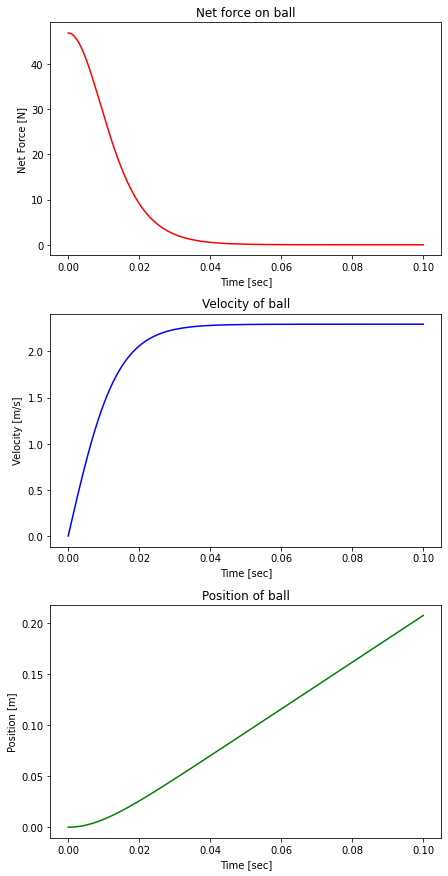

In [29]:
fig, axs = plt.subplots(3, 1, figsize=(7, 15))

axs[0].plot(time_points_sec, force_net_values_N, color="red")
axs[0].set(title="Net force on ball", 
           xlabel="Time [sec]", 
           ylabel="Net Force [N]")

axs[1].plot(time_points_sec, velocity_values_mps, color='blue')
axs[1].set(title="Velocity of ball",
           xlabel="Time [sec]",
           ylabel="Velocity [m/s]")

axs[2].plot(time_points_sec, position_ball_values_m, color='green')
axs[2].set(title="Position of ball",
           xlabel="Time [sec]",
           ylabel="Position [m]")

plt.subplots_adjust(wspace=0.25, hspace=0.25)


### Determining behavior at terminal velocity

In [ ]:
# Determining terminal velocity of ball underwater 
v_ball_mps_numerator = 2*(force_buoyancy_N - force_g_N)
v_ball_mps_denominator = rho_h20_kgpm3*coeff_drag*np.pi*np.power(r_ball_m, 2)
v_ball_mps = np.sqrt(v_ball_mps_numerator/v_ball_mps_denominator)
v_ball_mps_string = "{:.3f}".format(v_ball_mps)

print("Terminal velocity of ball: " + v_ball_mps_string + " m/s")

### Questions and miscellaneous thoughts
1. How much do we need to account for surface tension? Based on research, because the object is big, and the effects of other forces play a greater role, surface tension might not come into play. However, based on experimenting with submerging the ball, if the ball is submerged deep enough, the ball won't be "launched." Rather, it will come up to the surface with a layer of water on it, and soon the water will "fall off." I believe that this is the surface tension that is acting on the ball because when the net force on the ball is zero from the other forces, the surface tension could be big enough that it would push the ball down or keep it submerged for as long as it can. 